# Exploratory Data Analysis (EDA) for Milk Yield Dataset

This notebook provides a comprehensive EDA of the synthetic milk yield dataset, including feature distributions, correlations, and relationships with the target variable.

In [1]:
# 1. Create Notebooks Directory (if running elsewhere)
import os
os.makedirs("../notebooks", exist_ok=True)

In [2]:
# 2. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 3. Load Dataset
df = pd.read_csv("../data/synthetic_milk_yield_dataset.csv")
df.head()

,cow_id,milk_yesterday,milk_7day_avg,days_in_milk,parity,breed,feed_concentrate_qty,green_fodder_qty,milking_frequency,health_flag,ambient_temp,humidity,season,cow_mean_yield
0,1,12.906326,10.387627,1,1,Jersey,2.232334,22.992642,2,Healthy,20.308767,88.495493,Winter,11.269469
1,1,10.270575,10.040903,2,1,Jersey,2.733618,14.563634,2,Healthy,24.368437,70.592645,Winter,11.269469
2,1,9.834026,10.370737,3,1,Jersey,4.473544,15.736930,3,Healthy,32.899106,74.015377,Summer,11.269469
3,1,10.375980,10.021142,4,1,Jersey,4.736932,16.602287,2,Healthy,20.515828,85.466020,Winter,11.269469
4,1,10.184240,9.356662,5,1,Jersey,4.080272,18.200654,2,Sick,31.626992,86.974947,Winter,11.269469


## Explore Dataset Structure
Let's check the structure, missing values, and summary statistics of the dataset.

In [4]:
# 4. Explore Dataset Structure
df.info()
df.isnull().sum()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cow_id                10000 non-null  int64  
 1   milk_yesterday        10000 non-null  float64
 2   milk_7day_avg         10000 non-null  float64
 3   days_in_milk          10000 non-null  int64  
 4   parity                10000 non-null  int64  
 5   breed                 10000 non-null  object 
 6   feed_concentrate_qty  10000 non-null  float64
 7   green_fodder_qty      10000 non-null  float64
 8   milking_frequency     10000 non-null  int64  
 9   health_flag           10000 non-null  object 
 10  ambient_temp          10000 non-null  float64
 11  humidity              10000 non-null  float64
 12  season                10000 non-null  object 
 13  cow_mean_yield        10000 non-null  float64
dtypes: float64(7), int64(4), object(3)
memory usage: 1.1+ MB


,count,mean,std,min,25%,50%,75%,max
cow_id,10000.0,50.500000,28.867513,1.000000,25.750000,50.500000,75.250000,100.000000
milk_yesterday,10000.0,11.482696,2.523170,3.409616,9.626333,11.503171,13.346513,19.439895
milk_7day_avg,10000.0,11.491687,2.241496,5.419555,9.774547,11.510930,13.226813,18.301207
days_in_milk,10000.0,50.500000,28.867513,1.000000,25.750000,50.500000,75.250000,100.000000
parity,10000.0,2.360000,1.091109,1.000000,1.000000,2.000000,3.000000,4.000000
feed_concentrate_qty,10000.0,3.978299,1.152429,2.000190,2.963937,3.979126,4.979609,5.999759
green_fodder_qty,10000.0,17.543202,4.331298,10.002826,13.814363,17.610056,21.342861,24.996617
milking_frequency,10000.0,2.098800,0.526561,1.000000,2.000000,2.000000,2.000000,3.000000
ambient_temp,10000.0,27.451827,4.325639,20.000308,23.730718,27.391227,31.174944,34.997923
humidity,10000.0,65.015193,14.573237,40.003375,52.294305,65.132024,77.878053,89.994633


## Visualize Feature Distributions
Let's plot histograms, boxplots, and violin plots for numerical features.

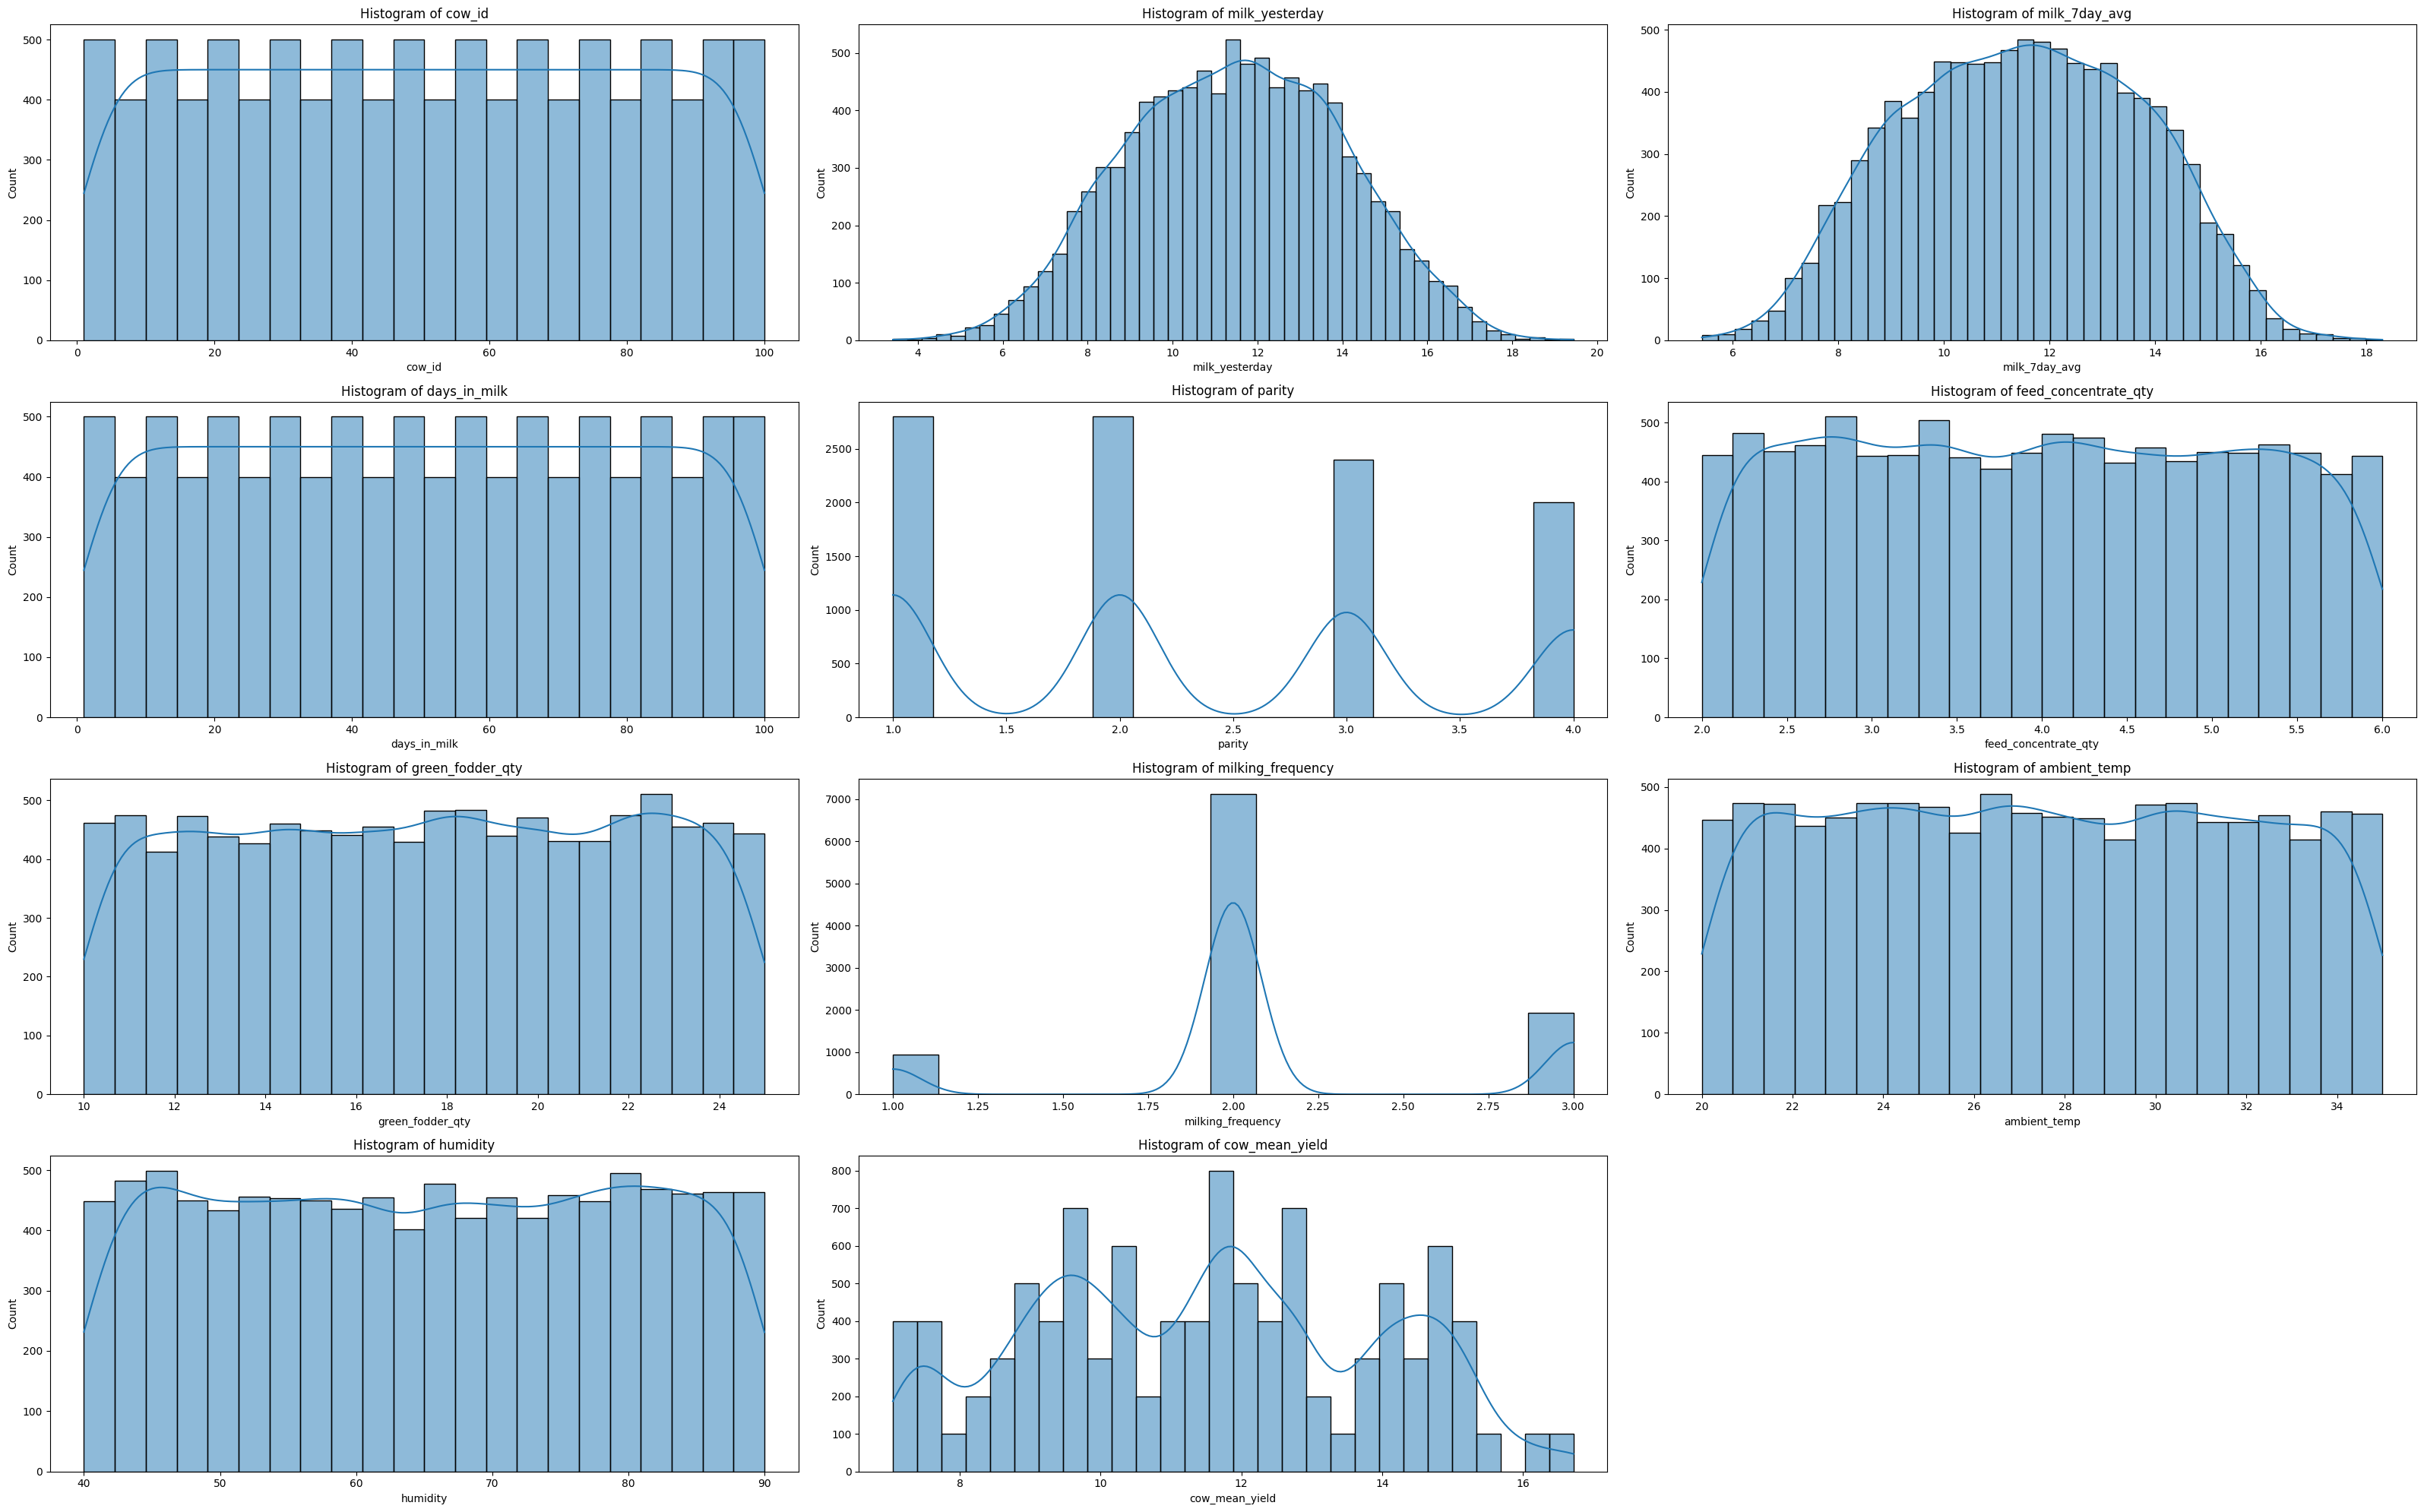

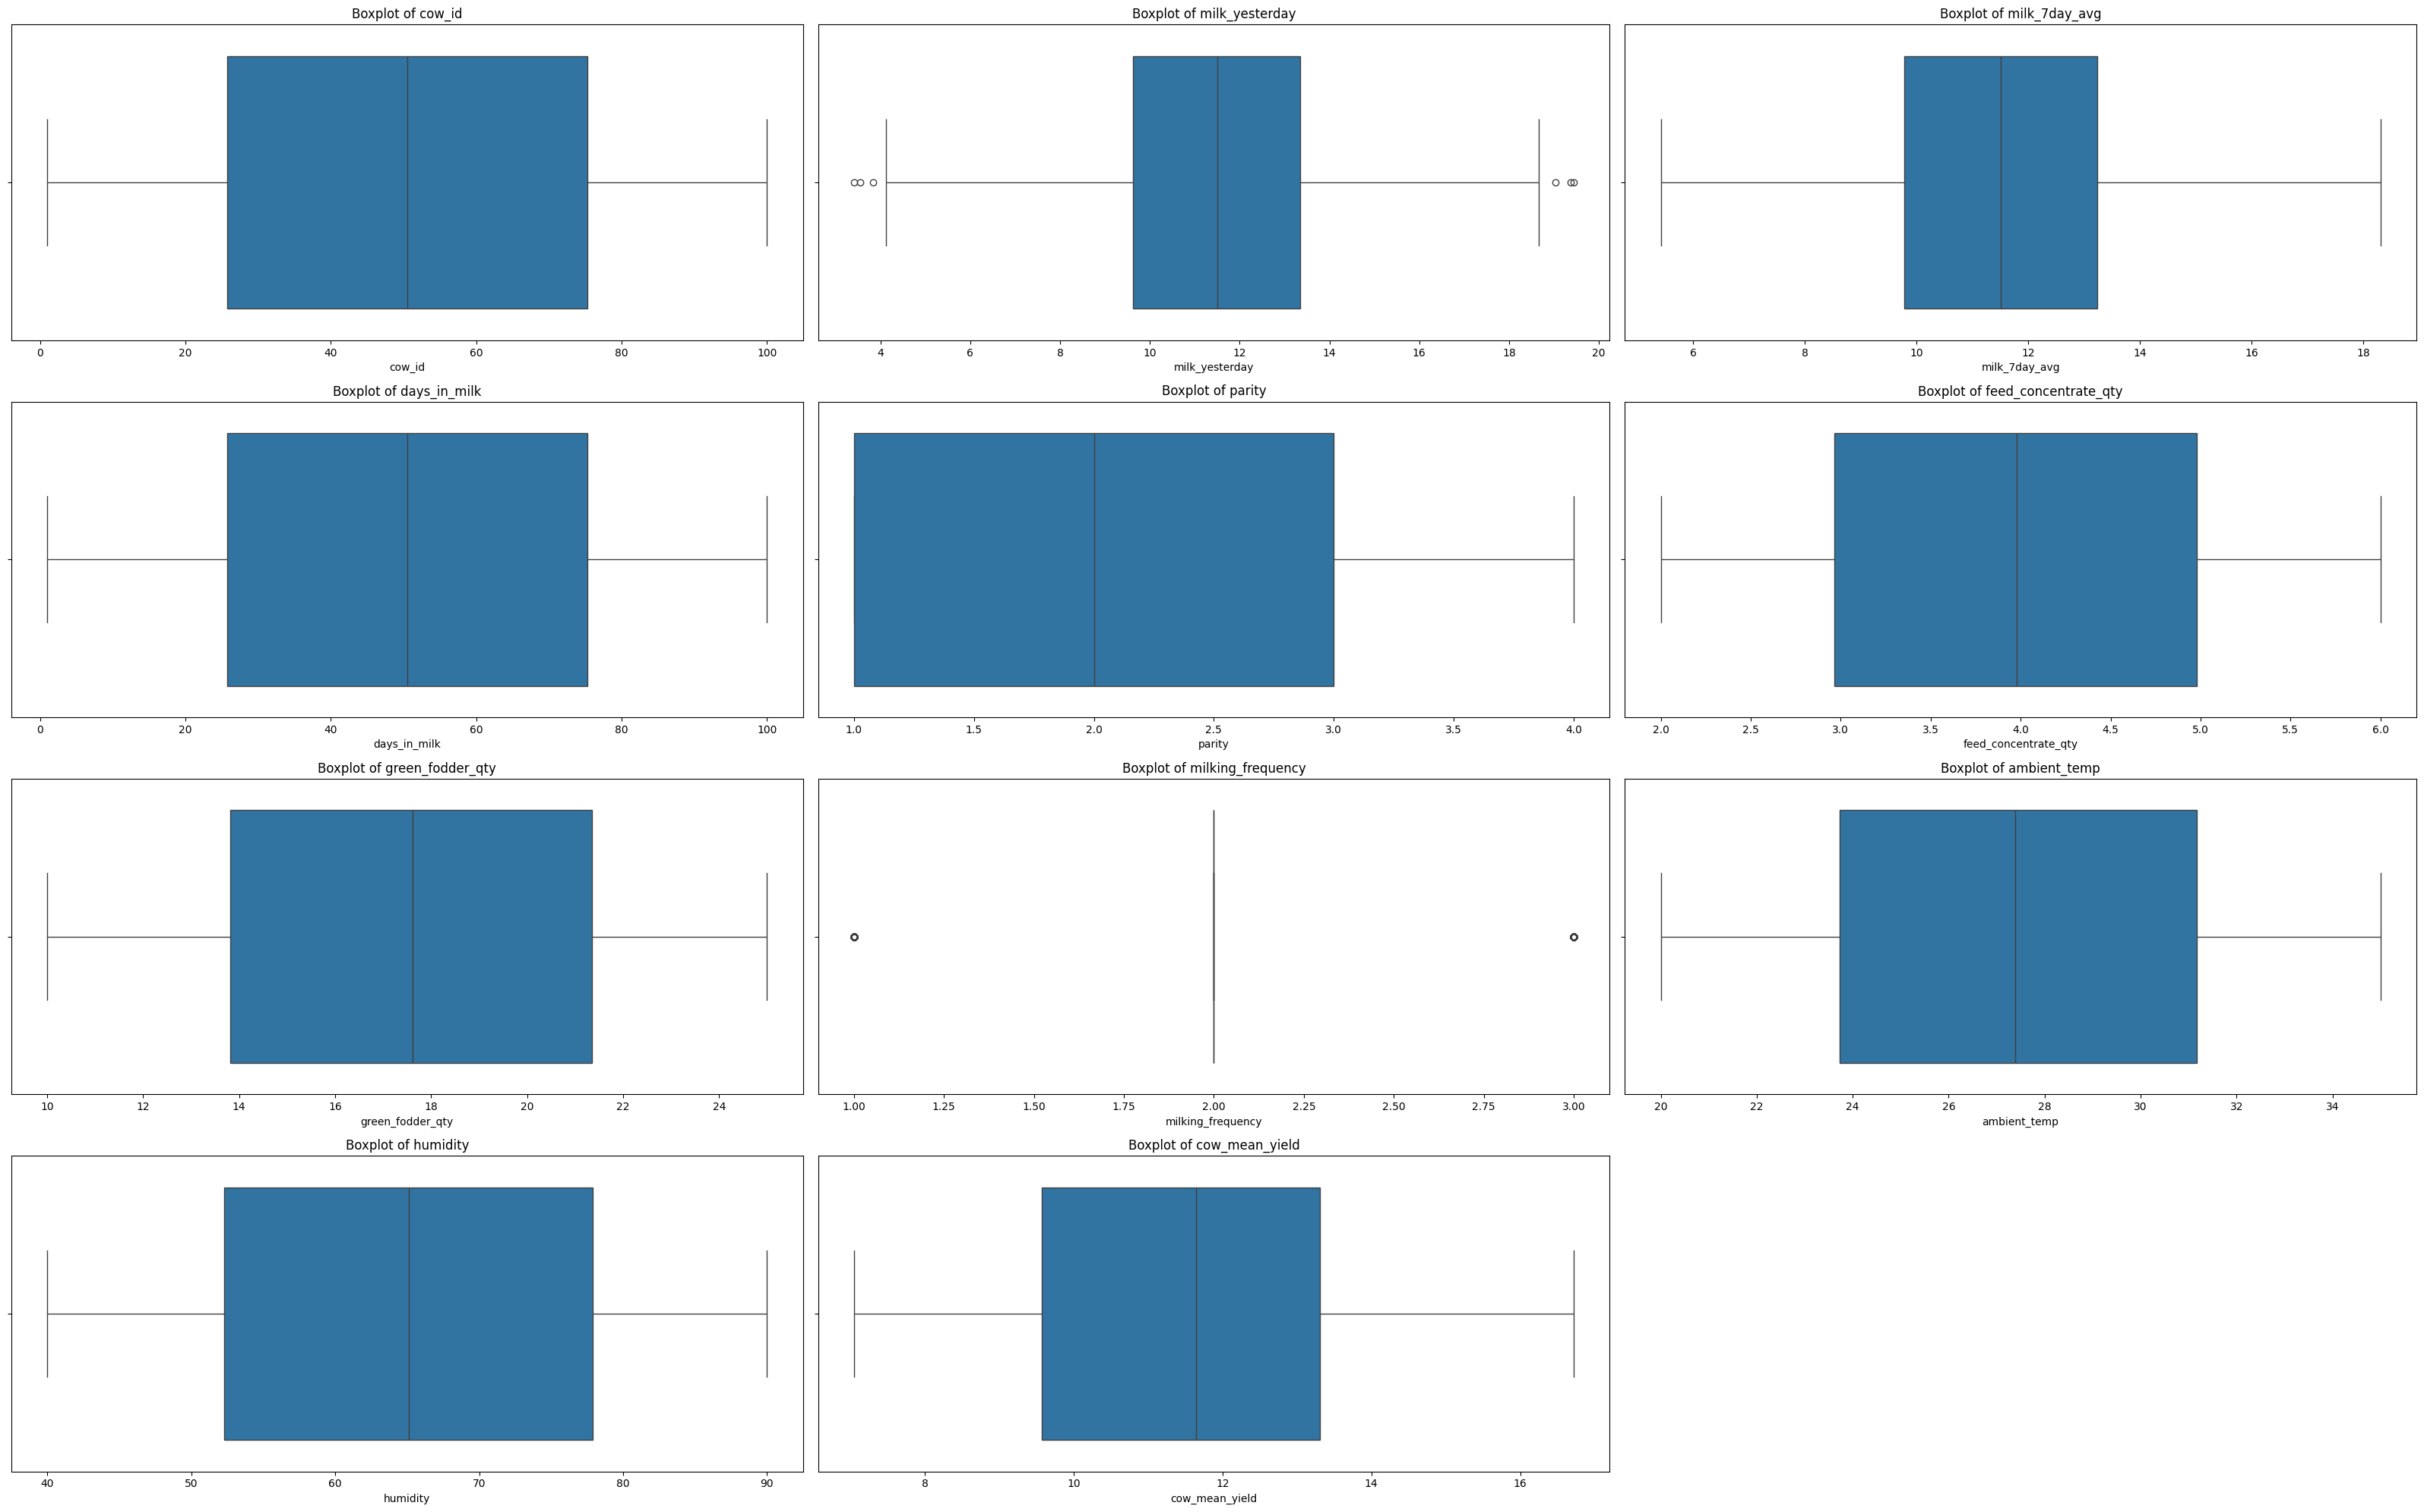

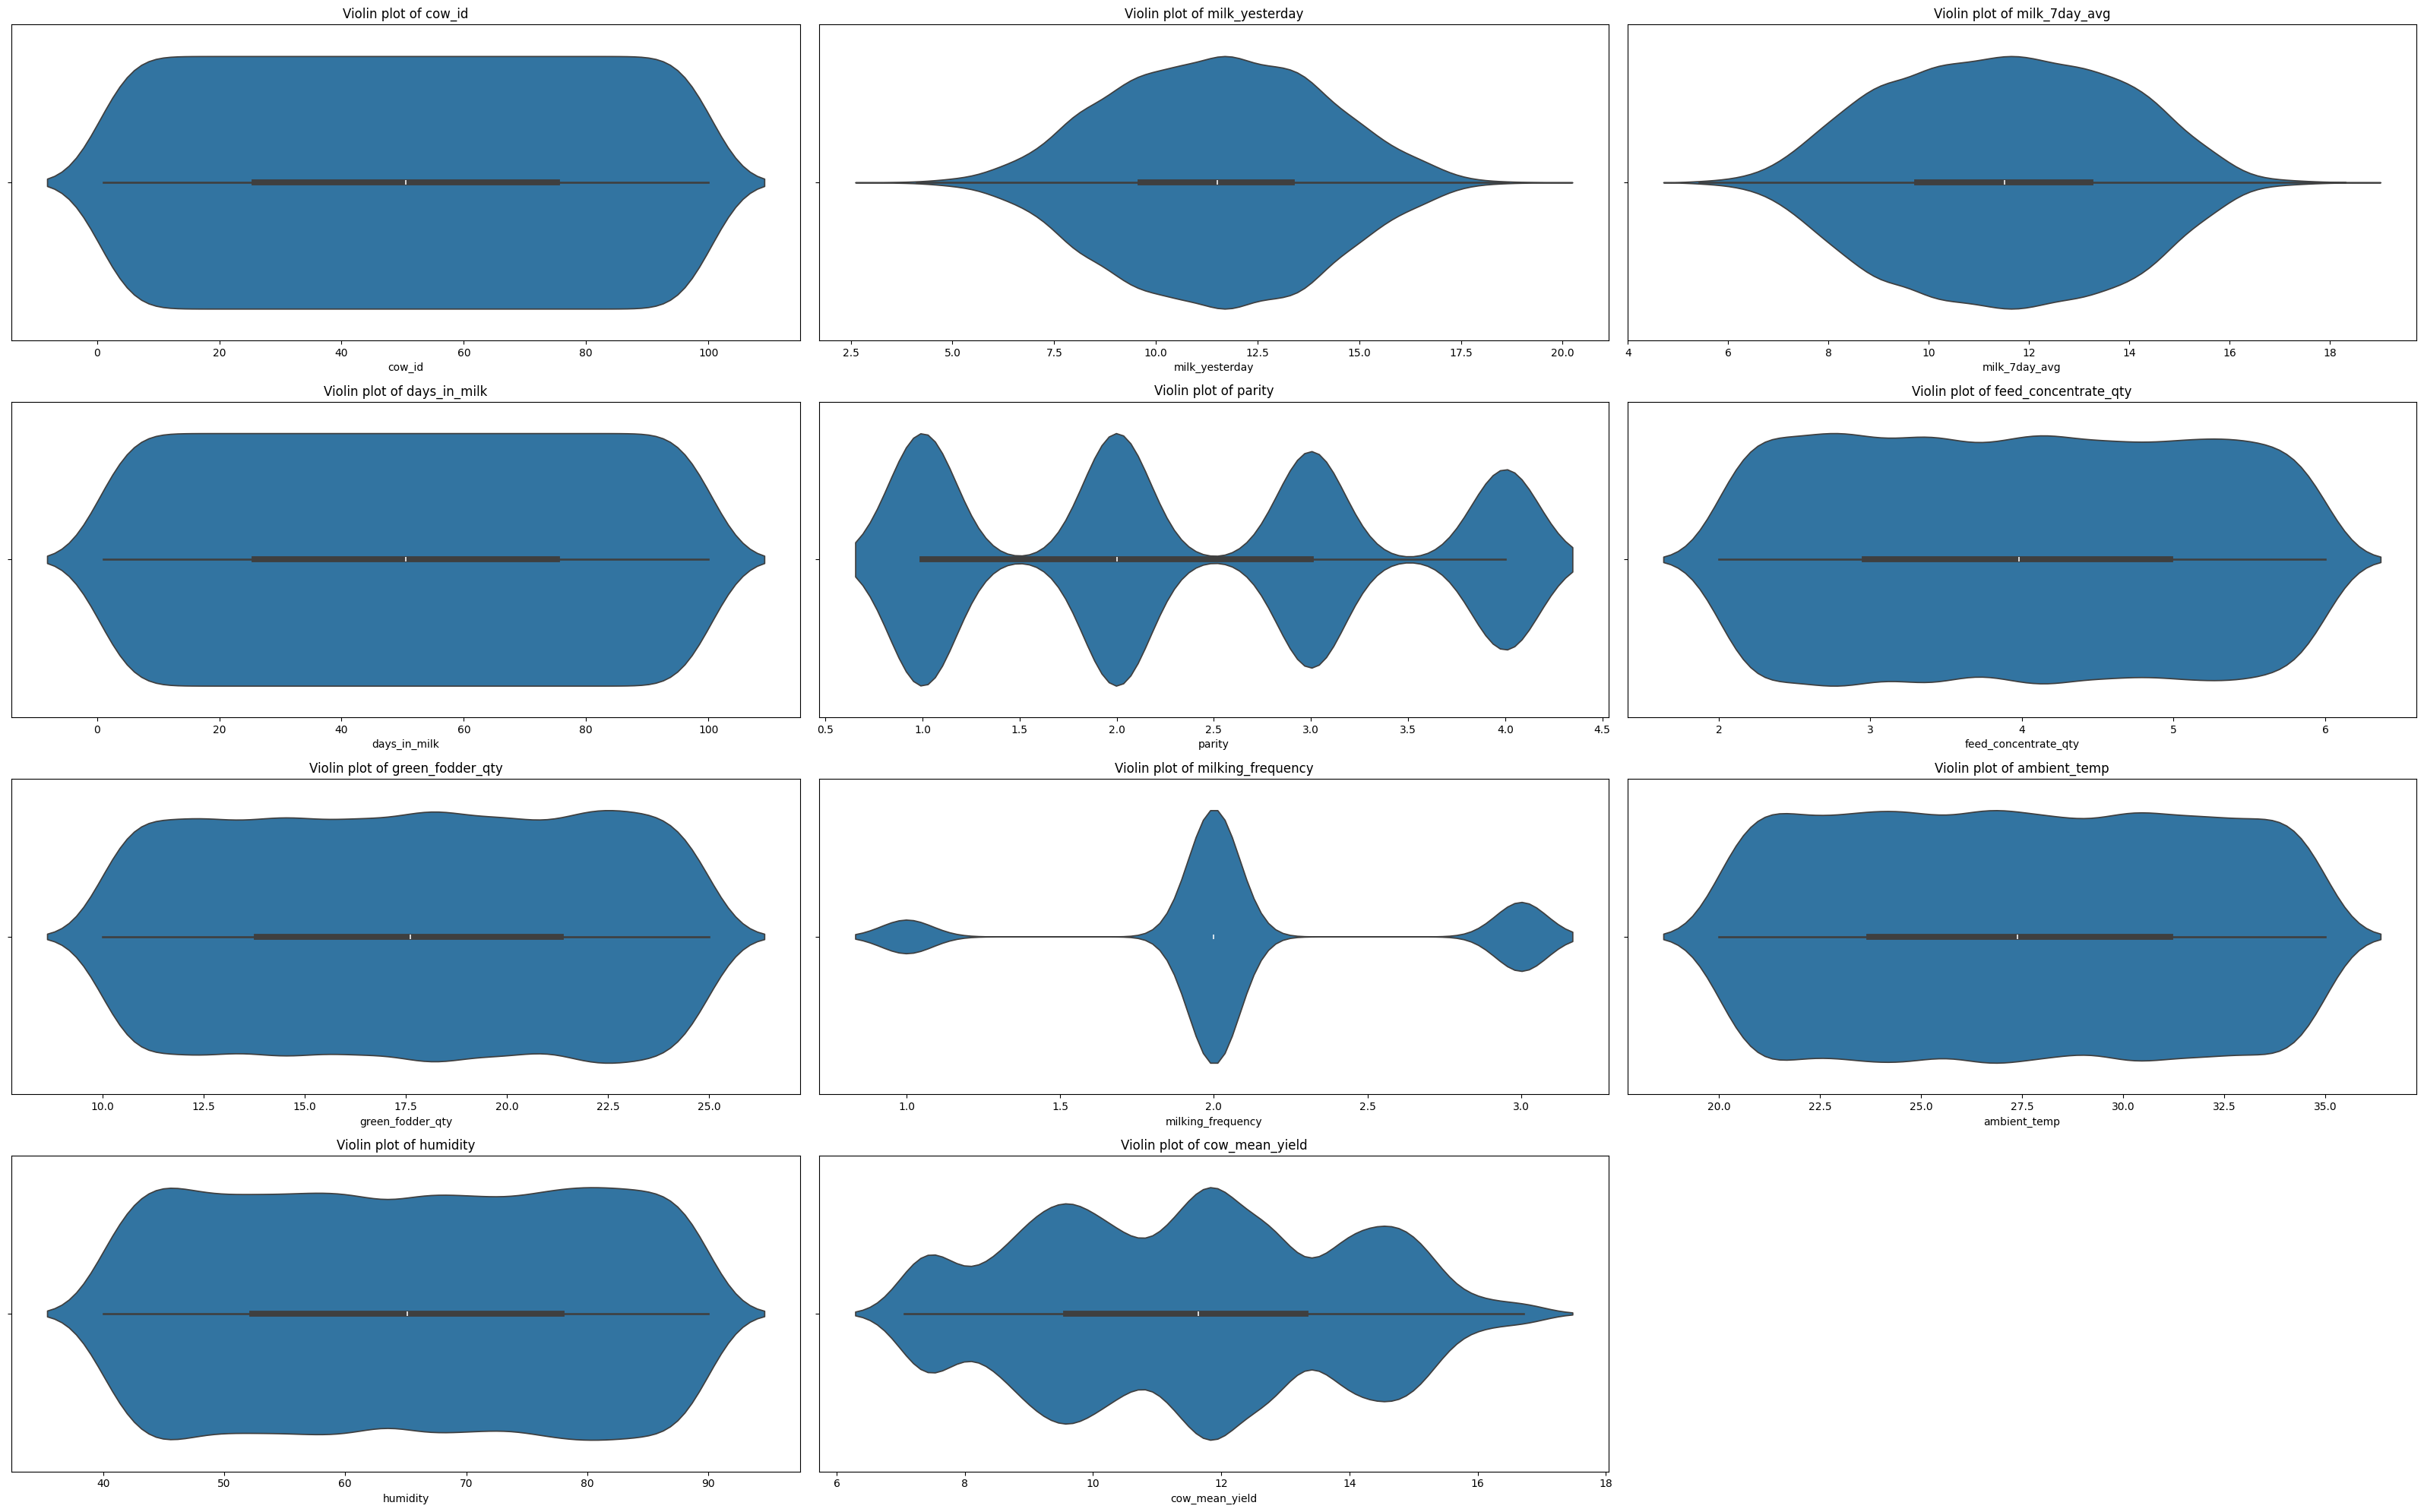

In [13]:
# 5. Visualize Feature Distributions
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(32, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(32, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(32, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.violinplot(x=df[col])
    plt.title(f"Violin plot of {col}")
plt.tight_layout()
plt.show()

## Visualize Correlations
Let's plot a correlation heatmap to see relationships between numerical features.

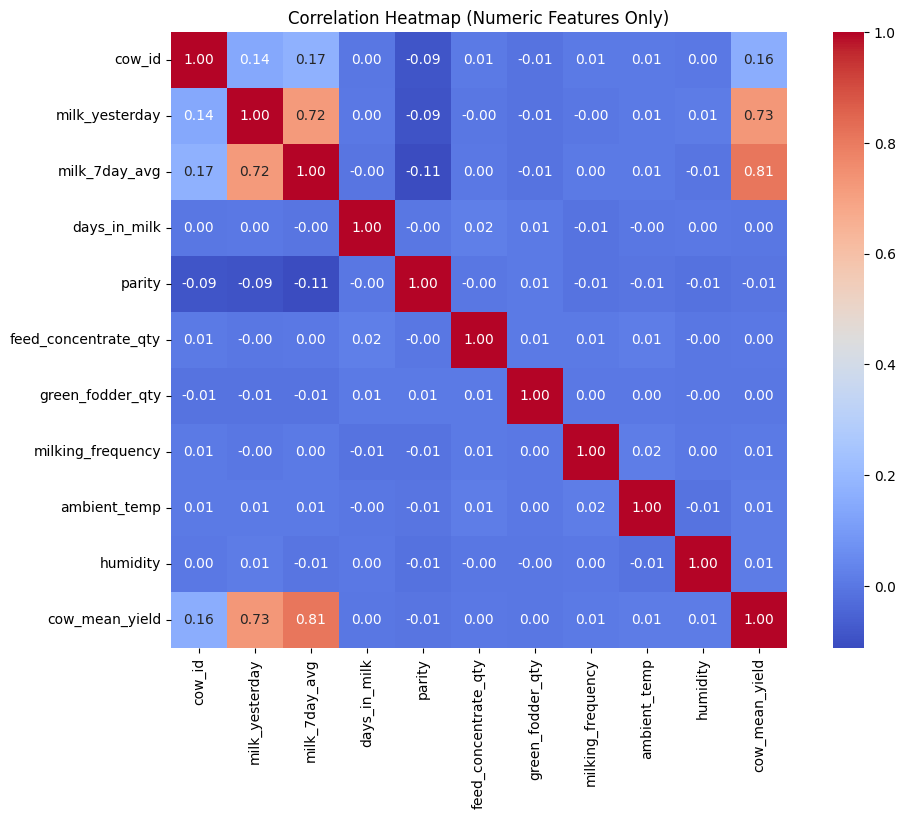

In [7]:
# 6. Visualize Correlations
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

## Visualize Target Variable
Let's plot the distribution of the target variable and its relationship with key features.

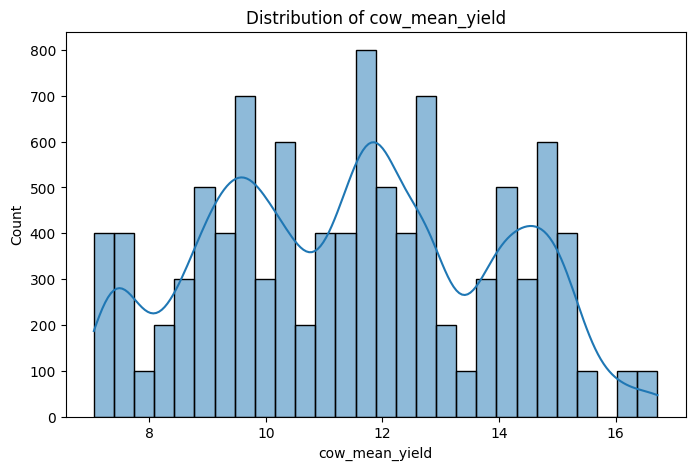

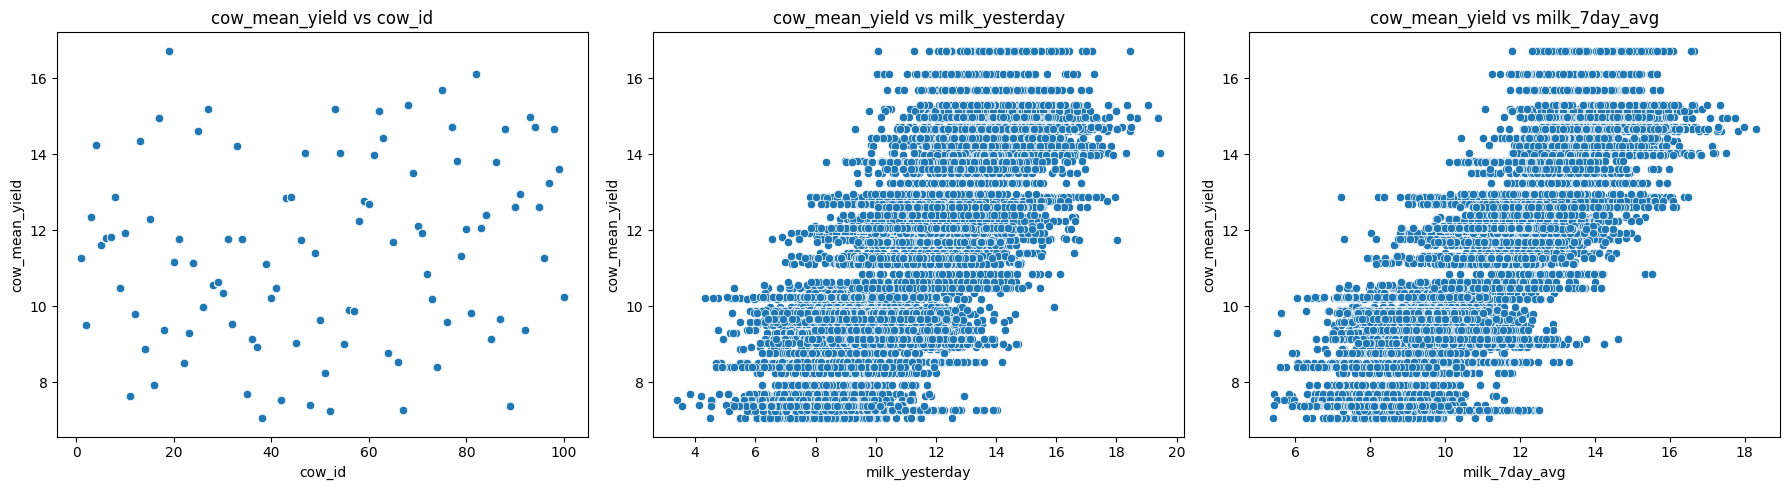

In [8]:
# 7. Visualize Target Variable
target = "cow_mean_yield"
plt.figure(figsize=(8, 5))
sns.histplot(df[target], kde=True)
plt.title(f"Distribution of {target}")
plt.show()

# Relationship with key features (scatter plots)
key_features = [col for col in df.columns if col != target and df[col].dtype != 'O'][:3]  # pick 3 numeric features
plt.figure(figsize=(18, 5))
for i, col in enumerate(key_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[col], y=df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{target} vs {col}")
plt.tight_layout()
plt.show()

## Outlier Detection and KDE Plot
Let's visualize outliers using boxplots and detect them with z-score. We'll also plot a KDE of the target feature.

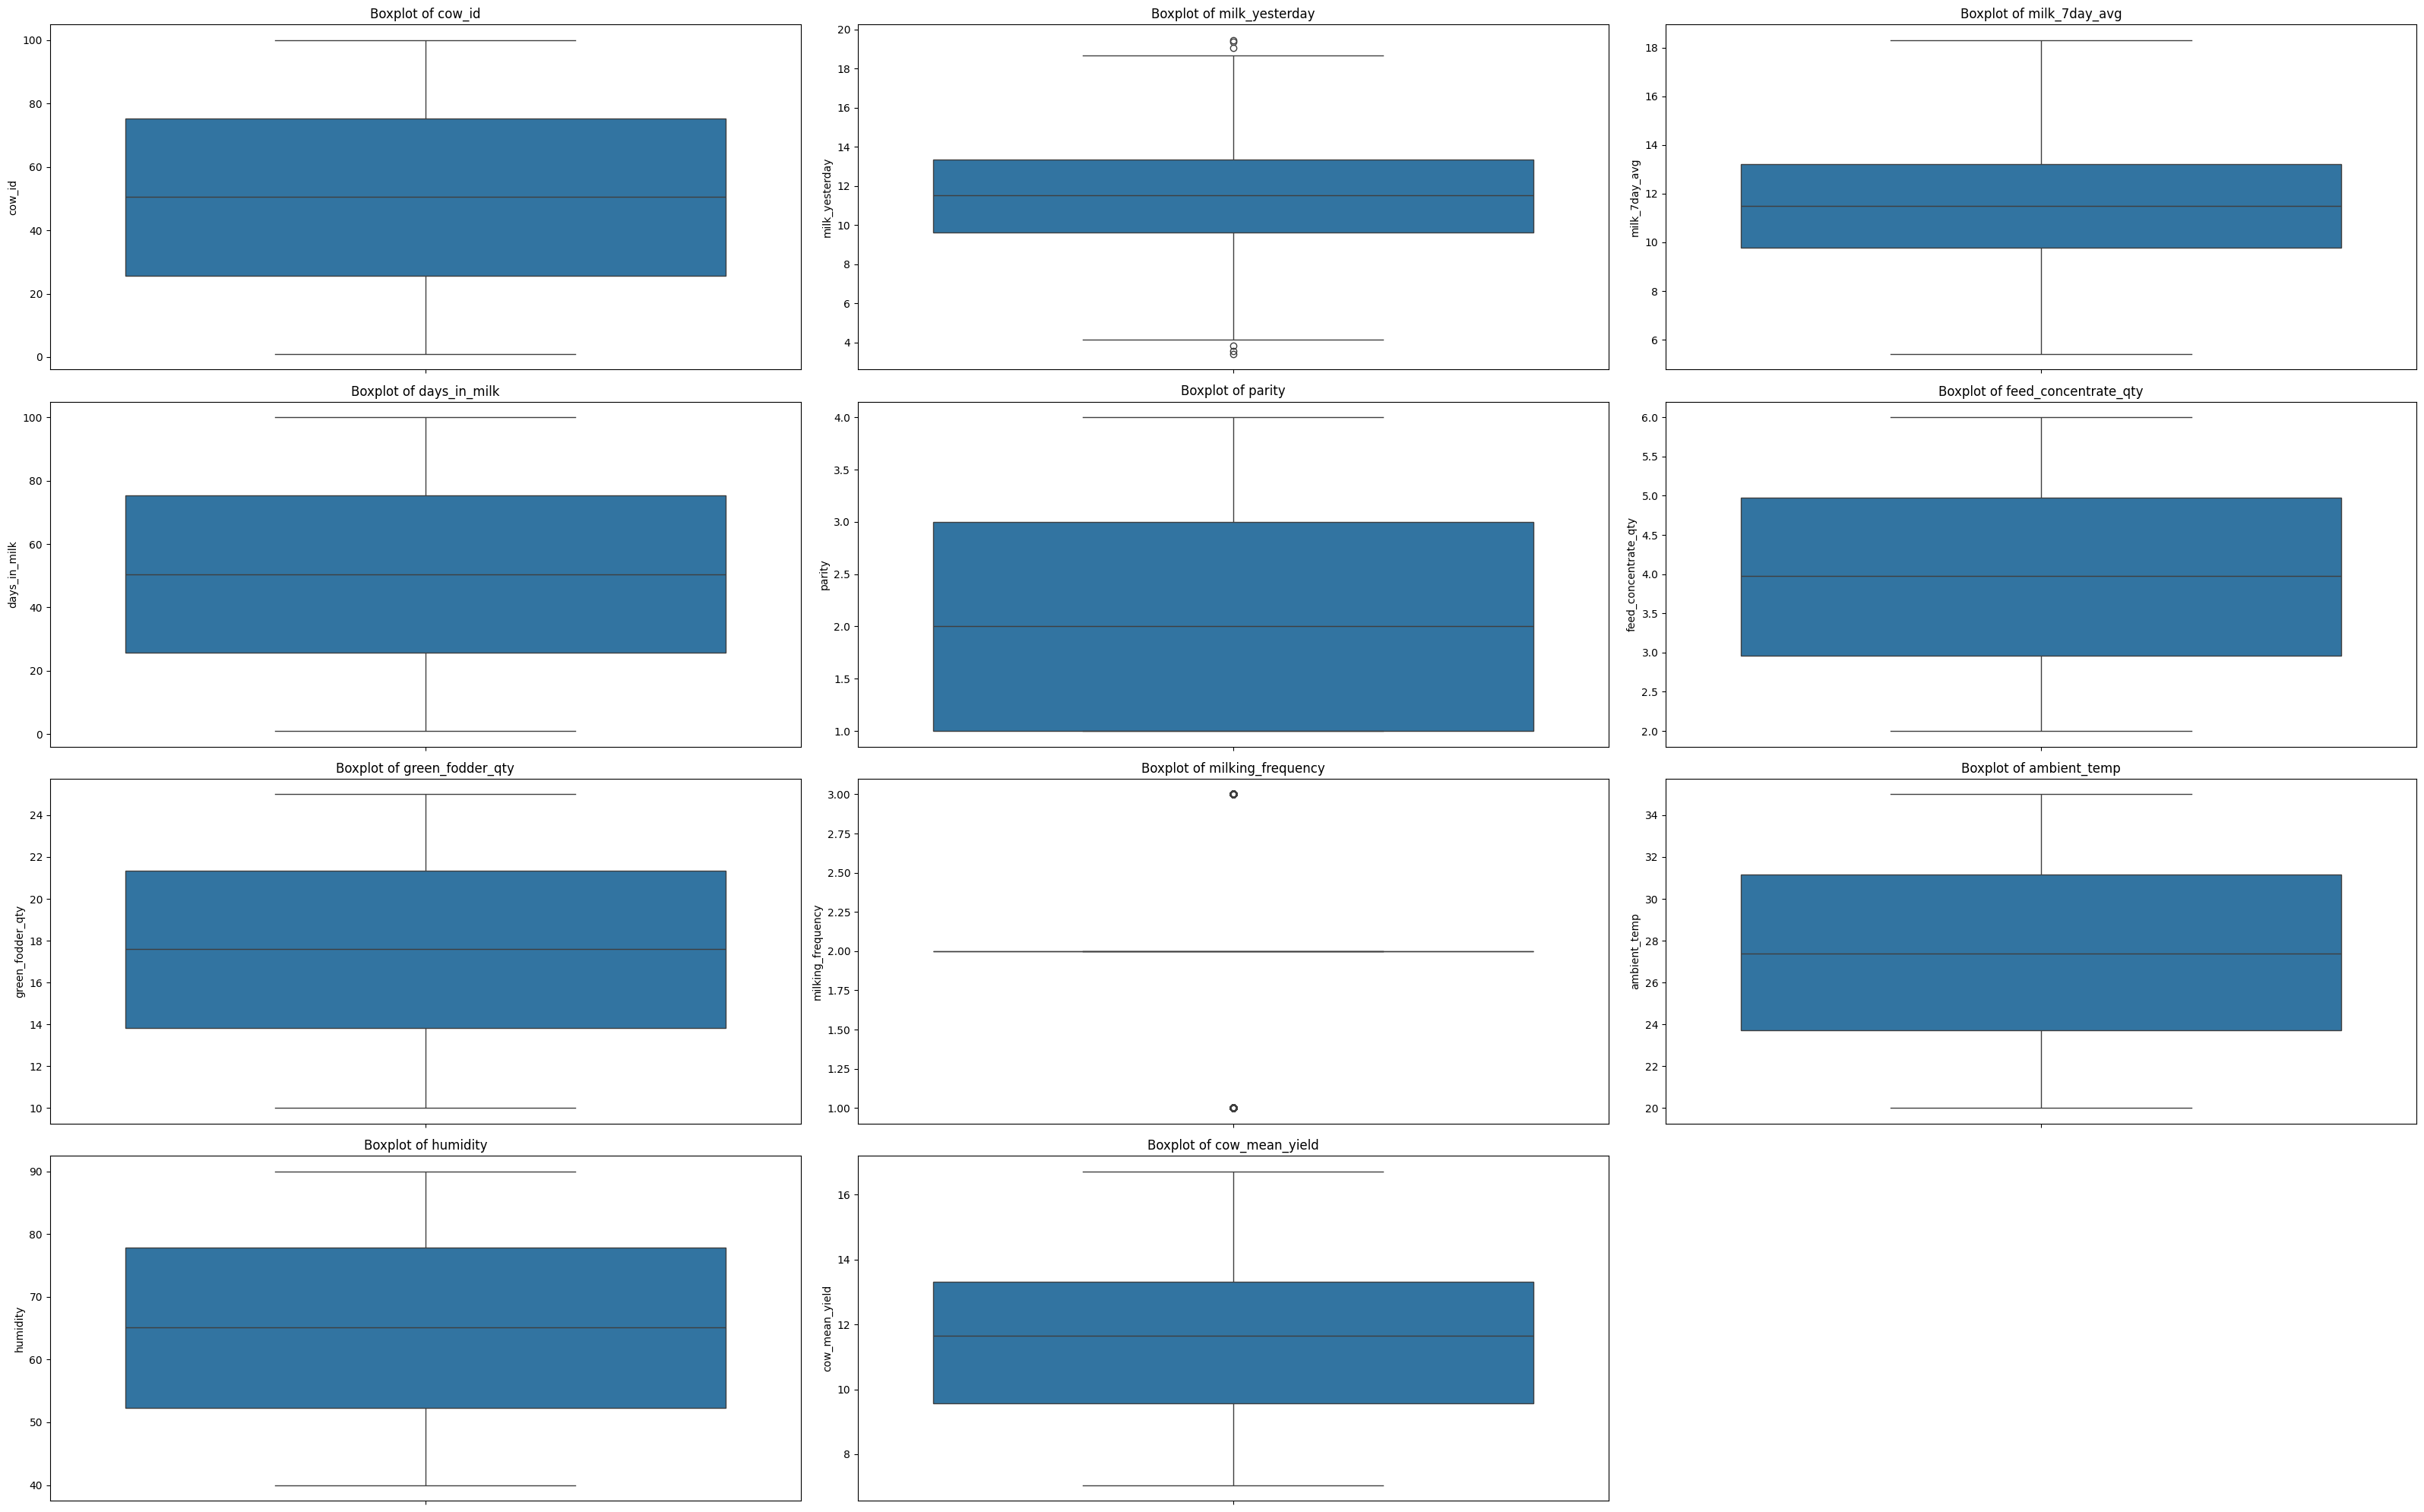

Outlier count (z-score > 3): {'cow_id': np.int64(0), 'milk_yesterday': np.int64(5), 'milk_7day_avg': np.int64(1), 'days_in_milk': np.int64(0), 'parity': np.int64(0), 'feed_concentrate_qty': np.int64(0), 'green_fodder_qty': np.int64(0), 'milking_frequency': np.int64(0), 'ambient_temp': np.int64(0), 'humidity': np.int64(0), 'cow_mean_yield': np.int64(0)}


In [12]:
# 8. Outlier Detection (Boxplots & Z-score)
from scipy.stats import zscore

plt.figure(figsize=(32, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Z-score outlier detection
outlier_summary = {}
for col in num_cols:
    z = np.abs(zscore(df[col].dropna()))
    outlier_summary[col] = (z > 3).sum()
print("Outlier count (z-score > 3):", outlier_summary)

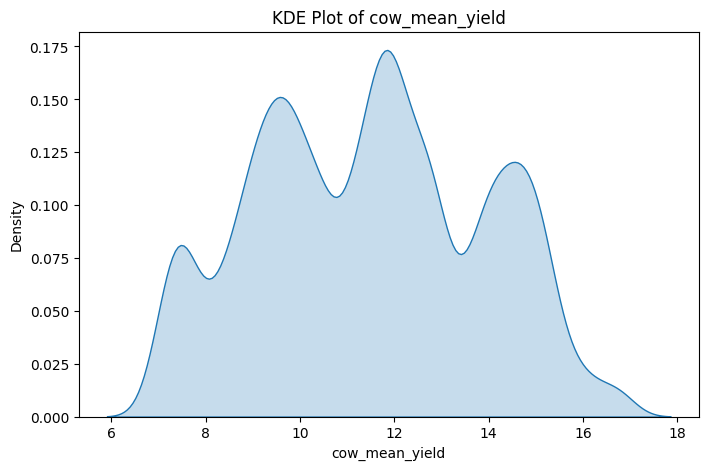

In [10]:
# KDE plot of the target feature
plt.figure(figsize=(8, 5))
sns.kdeplot(df[target], fill=True)
plt.title(f"KDE Plot of {target}")
plt.xlabel(target)
plt.show()